<a href="https://colab.research.google.com/github/tanyaS121/HeartDiseasePrediction/blob/main/HeartD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

Loading the dataset

In [5]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape of the dataset

In [6]:
data.shape

(303, 14)

Variable types in the dataset

In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##**EDA AND PRE-PROCESSING**


Outcome variable count

In [ ]:
sns.catplot(x='target', kind='count', palette='ch:.25', data=data)


###Categorical predictive variables

Sex

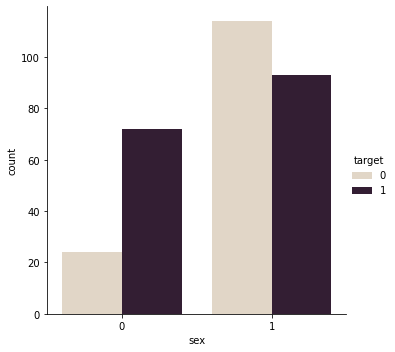

In [8]:
sns.catplot(x='sex', kind='count', hue='target', data=data, palette='ch:.25')

Cp

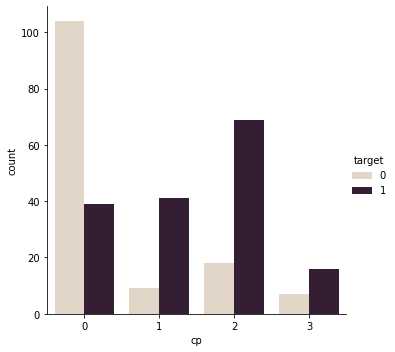

In [9]:
sns.catplot(x='cp', kind='count', hue='target', data=data, palette='ch:.25')

Fbs

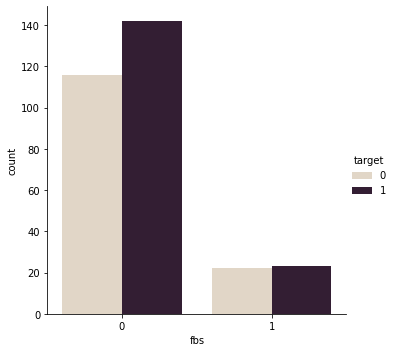

In [10]:
sns.catplot(x='fbs', kind='count', hue='target', data=data, palette='ch:.25')

Restecg

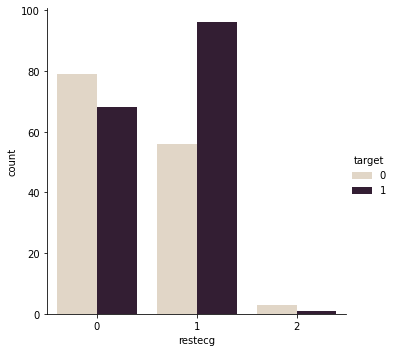

In [11]:
sns.catplot(x='restecg', kind='count', hue='target', data=data, palette='ch:.25')

Exang

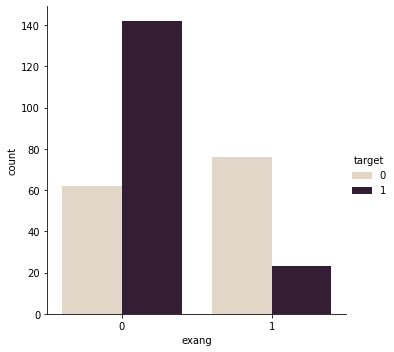

In [12]:
sns.catplot(x='exang', kind='count', hue='target', data=data, palette='ch:.25')

Slope

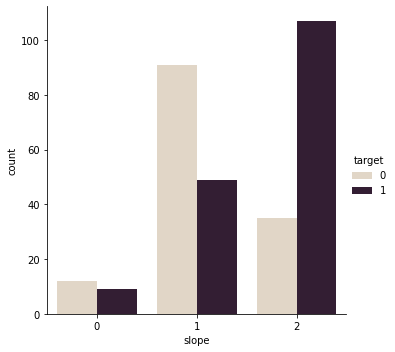

In [13]:
sns.catplot(x='slope', kind='count', hue='target', data=data, palette='ch:.25')

Ca

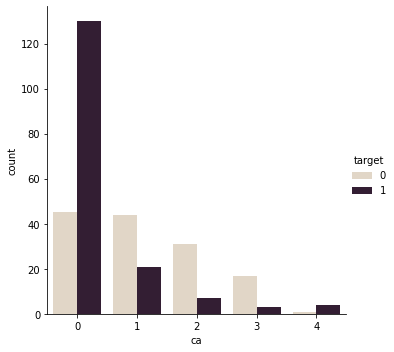

In [14]:
sns.catplot(x='ca', kind='count', hue='target', data=data, palette='ch:.25')

Thal

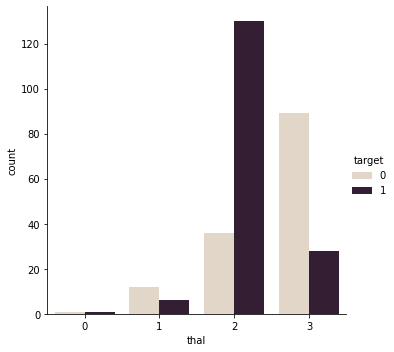

In [15]:
sns.catplot(x='thal', kind='count', hue='target', data=data, palette='ch:.25')

Distributional predictive variables

In [19]:
data[['age','trestbps','chol','thalach','oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


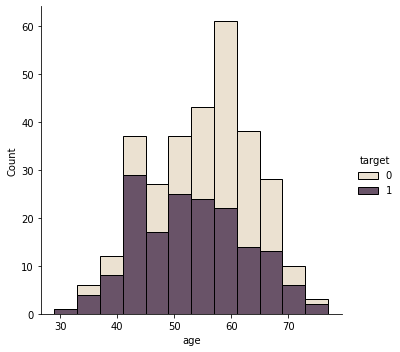

In [20]:
sns.displot(x='age', multiple='stack', hue='target', data=data, palette='ch:.25')

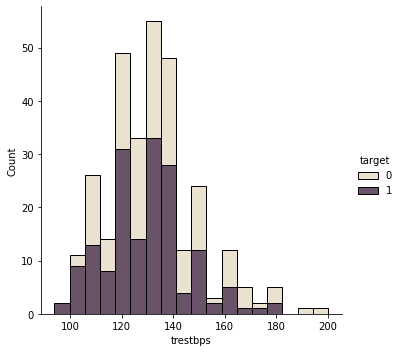

In [21]:
sns.displot(x='trestbps', multiple='stack', hue='target', data=data, palette='ch:.25')

In [ ]:
sns.displot(x='chol', multiple='stack', hue='target', data=data, palette='ch:.25')

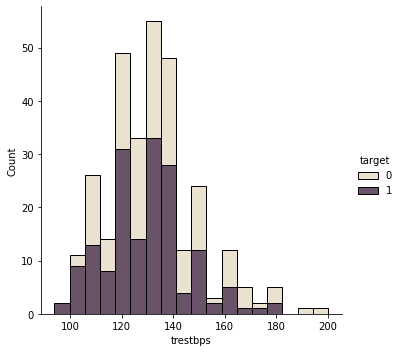

In [22]:
sns.displot(x='trestbps', multiple='stack', hue='target', data=data, palette='ch:.25')

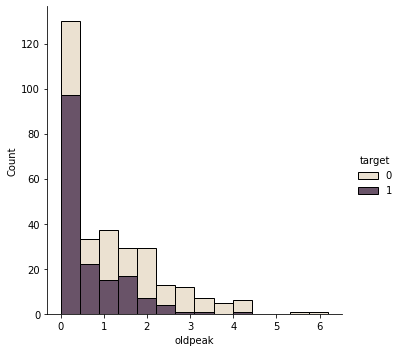

In [23]:
sns.displot(x='oldpeak', multiple='stack', hue='target', data=data, palette='ch:.25')

## **SPLITTING AND PRE-PROCESSING**

Defining x_train,x_test,y_train and y_test

In [24]:
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling the data

In [25]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

#**TRAINING THE MODEL**

Parameters for grid search

In [26]:
knn = KNeighborsClassifier()
parameters = {'n_neighbours': [3,5,7,9,11], 'weights': ['uniform', 'distance']}

Fitting training data and grid searching

In [ ]:
grid = GridSearchCV(knn, parameters, cv=4, scoring='accuracy')
grid.fit(x_train, y_train)

Display best parameters

In [ ]:
print(grid.best_params_)

Picking the best model

In [ ]:
model = grid.best_estimator_

#**EVALUATING  THE MODEL**

Confusion matrix

In [ ]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show

Calculating sensitivity, specificity, PPV and NPV

In [ ]:
TP = 28
FP = 2
TN = 27
FN = 4
sensitivity = TP/(TP+FN) *100
specificity = TN/(TN+FP) *100
ppv = TP/(TP+FP) *100
npv = TN/(TN+FN) *100

Printing sensitivity, specificity, PPV and NPV

In [ ]:
print('Sensitivity:', sensitivity,'%', 'Specificity:',specificity, '%','positive predictive value:', ppv, '%','negative predictive value', npv, '%')

AUC Score

In [ ]:
probs = model.predict_proba(x_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
print(auc)

ROC curve

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.show()